<a href="https://colab.research.google.com/github/MarleneChevalier/Deep-Learning/blob/master/Projet_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning : Mise en application  
====================================
Marlène Chevalier - Executive Master Statistique et Big Data

Septembre 2020 

Sujet
====
Il s'agit d'un mini projet, sous forme d'un rapport expliquant les résultats obtenus à partir des méthodes de deep learning vues en cours.

**Les données choisies**  
Il s'agit de données concernant la consommation d'énergie dans un immeuble à basse consommation. Le fichier a été extrait de kaggle et vient de l'université de Mons (Belgique) : *KAG_energydata_complete.csv*.  
https://www.kaggle.com/loveall/appliances-energy-prediction  

Il est constitué de 19735 lignes qui constituent chacune un enregistrement de mesures faites entre janvier et mai 2016 sur 29 variables : 
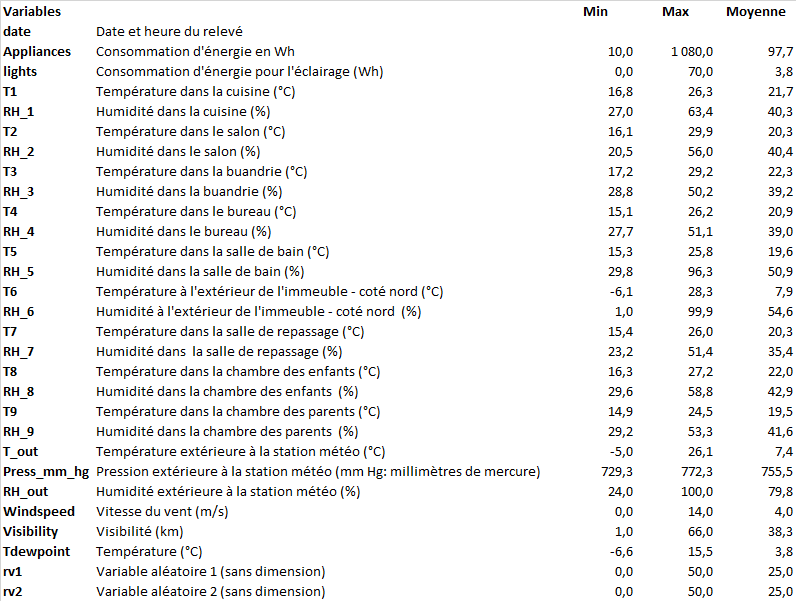   

Il n'y a pas de valeurs manquantes.


Librairies utilisées
====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [1]:
import os
clear=lambda:os.system('cls')
clear()

32512

In [2]:
%matplotlib inline
import numpy as np # fonctions de calcul
import matplotlib.pyplot as plt # graphiques
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd # chargement des données
import datetime # gestion des dates
import sklearn as sl # optimisation 
import sklearn.linear_model as skl # optimisation
import sklearn.metrics as sklmet # optimisation
import test as t
import tensorflow as tf  # réseaux de neurones
import tensorflow.keras as ks # réseaux de neurones
import keras.models as km # réseaux de neurones
import keras.layers as kl # réseaux de neurones
import keras.utils as ku # réseaux de neurones
import keras.metrics as kt # réseaux de neurones
%reload_ext autoreload
%autoreload 2

Préparation des données
====================================


__Chargement des données__

In [3]:
#Fonction pour chargement via google collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Chargement de la base de données
id = '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'
downloaded = drive.CreateFile({'id': '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'})
downloaded.GetContentFile('KAG_energydata_complete.csv')


In [4]:
data_energy = pd.read_csv('KAG_energydata_complete.csv')

__Distribution de la consommation électrique__

Consommation électrique moyenne :  97.7 W/h
Ecart type : 102.5
Consommation électrique médiane : 60.0 W/h


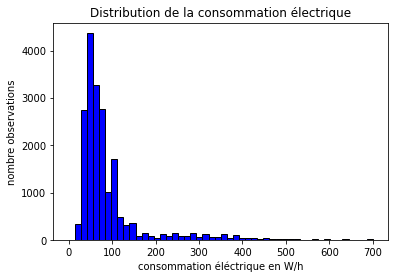

In [5]:
plt.hist(data_energy['Appliances'], range = (0, 700), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('consommation éléctrique en W/h')
plt.ylabel('nombre observations')
plt.title('Distribution de la consommation électrique')
print('Consommation électrique moyenne : ',round(np.mean(data_energy['Appliances']),1),'W/h')
print('Ecart type :',round(np.std(data_energy['Appliances']),1))
print('Consommation électrique médiane :',round(np.quantile(data_energy['Appliances'], 0.5),3),'W/h')

La consommation éléctrique est fortement concentrée entre 30 et 80 Wh, avec une valeur médiane à 60Wh.

__Corrélations des variables du jeu de données__

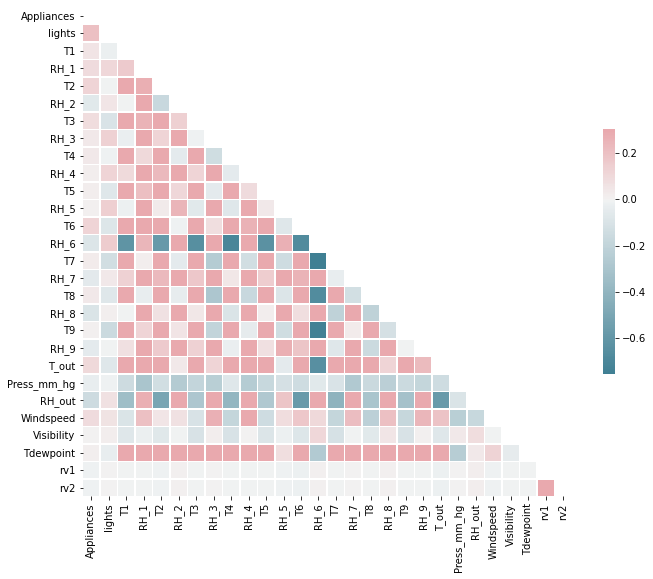

In [6]:
# Calcul des corrélations
corr = data_energy.corr()
# Masque triangle du graphique
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Parametres graphiques
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Tracé du graphe
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Il apparait de fortes corrélations : 
* entre les taux d'humidité extérieur et les mesures de température (RHT et T1 à T9): corrélations négatives 
* entre les températures entre elles (T1 à T9) : corrélation positive  
* entre la mesure de température (Tdewpoint) et les autres températures ainsi que les taux d'humidité

Aucune corrélation entre les variables aléatoires rv1 et rv2 et le reste des variables.

__Création de variables catégorielles de la consommation électrique__

Nous définissons une variable catégorielle, Appliances_cat, indiquant le niveau de consommation en électricité. 
Si la consommation enregistrée est : 
* inférieure à la  borne de sous-consommation, Appliances_cat = 0 
* entre les 2 bornes (sousconso,surconso), Appliances_cat = 1
* supérieure à la  borne de sur-consommation, Appliances_cat = 2

borne de sous-consommation = consommation moyenne mensuelle - écart type de la consommation mensuelle. 

borne de sur-consommation = consommation moyenne mensuelle + écart type de la consommation mensuelle.

Les consommations moyennes et écarts-types ( ainsi que les quantiles à 25%, 50% et à 75%) sont calculés pour chaque mois.

Nous inserons dans le jeu de données les nouvelles variables calculées.

In [9]:
# conversion du champs date en type date et extraction du mois et année 
data_energy['date'] = pd.to_datetime(data_energy['date'], errors='coerce')
data_energy['month'] = data_energy['date'].dt.month


# consommation électrique par mois : moyenne, 1er et 3eme quantiles et écart type
mean_conso = data_energy.groupby('month').mean()
std_conso = data_energy.groupby('month').std() 
S_sousconso = mean_conso-std_conso
S_surconso = mean_conso+std_conso
q25_conso=data_energy.groupby('month').quantile(q=0.25)
q50_conso=data_energy.groupby('month').quantile(q=0.5)
q75_conso=data_energy.groupby('month').quantile(q=0.75)

# creation d'un data frame des seuils de consommation
df_surconso = pd.DataFrame(S_surconso)
df_sousconso = pd.DataFrame(S_sousconso)
df_meanconso = pd.DataFrame(mean_conso)
df_stdconso = pd.DataFrame(std_conso)
df_q25=pd.DataFrame(q25_conso)
df_q50=pd.DataFrame(q50_conso)
df_q75=pd.DataFrame(q75_conso)

df2=pd.DataFrame()
df2['month']=[1,2,3,4,5]
df2['mean_conso'] = df_meanconso['Appliances']
df2['std_conso'] = df_stdconso['Appliances']
df2['surconso'] = df_surconso['Appliances']
df2['sousconso'] = df_sousconso['Appliances']
df2['q25_conso'] = df_q25['Appliances']
df2['q50_conso'] = df_q50['Appliances']
df2['q75_conso'] = df_q75['Appliances']
df2
# fusion des seuils de consommation avec le jeu de données
dftot=pd.DataFrame()
dftot=pd.merge(data_energy, df2, on = ['month'])
# Creation de la variable consommation catégorielle
for i in range(len(dftot['sousconso'])):
    if dftot['sousconso'][i]<0:
        dftot['sousconso'][i]=0
dftot['Appliances_cat']= 1
for i in range(len(dftot['Appliances'])):
    if dftot['Appliances'][i] < dftot['sousconso'][i]: 
        dftot['Appliances_cat'][i] = 0
    if dftot['Appliances'][i] > dftot['surconso'][i]:
        dftot['Appliances_cat'][i] = 2
print('dimension du jeu de données complété ', dftot.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


dimension du jeu de données complété  (19735, 38)


In [10]:
dftot['Appliances_cat'].describe()

count    19735.000000
mean         1.078794
std          0.269424
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Appliances_cat, dtype: float64

__Séparation du jeu de données complet en un jeu d'apprentissage (80%) et un jeu de test (20%)__

Le jeu d'apprentissage sera utilisé pour construire le modèle, le jeu test pour tester les performance prédictive du modèle.  

In [11]:
from sklearn.model_selection import train_test_split
# Générer l'ens de training. Fixer random_state pour répliquer les resultats ultérieurement.
train = dftot .sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = dftot.loc[~dftot.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print('dimension ensemble apprentisssage ', train.shape)
print('dimension ensemble test ',test.shape)

dimension ensemble apprentisssage  (15788, 38)
dimension ensemble test  (3947, 38)


__Séparer les features $X$ de la variable à prédire $Y$ (Appliances) dans les ensembles d'apprentissage et de test__  

Nous conservons dans la matrice de design (features $X$ ) toutes les covariables hormis la date/heureles , 2 variables aléatoires (dont la signification n'est pas connue) et les variables moyenne , ecart type, quantiles, seuil créés plus haut.

Deux variables réponse sont isolées : la consommation éléctrique en Wh (Aplliances) et celle crée en catégorielle plus haut(Appliances_cat).


In [12]:
[n,p] = dftot.shape

# separer la variable à prévoir (Y : Appliances et Ycat : Appliances_cat) et des variables prédictives (X) 

# ensembles apprentissage et test pour la variable à predire
Y_train = train['Appliances'] # variable reponse
Y_test = test['Appliances'] # variable reponse
Ycat_train = train['Appliances_cat'] # variable reponse catégorielle
Ycat_test = test['Appliances_cat'] # variable reponse catégorielle

# ensembles apprentissage et test des variables prédictives
X = dftot
X_train = train 
X_test = test
X_train.drop(['Appliances', 'date', 'rv1','rv2','mean_conso','std_conso','surconso','sousconso','q25_conso','q50_conso','q75_conso','Appliances_cat'], axis=1,inplace=True) # variables features training
X_test.drop(['Appliances', 'date', 'rv1','rv2','mean_conso','std_conso','surconso','sousconso','q25_conso','q50_conso','q75_conso','Appliances_cat'], axis=1,inplace=True) # variables features test

[n_train,p_train] = X_train.shape
[n_test,p_test] = X_test.shape

# affichage des dimensions des matrices de design
print('la matrice de design complète contient: ',n,'lignes et ',p,'variables explicatives')
print('la matrice de design d apprentissage contient: ',n_train,'lignes et ',p_train,'variables explicatives')
print('la matrice de design test contient: ',n_test,'lignes et ',p_test,'variables explicatives')

la matrice de design complète contient:  19735 lignes et  38 variables explicatives
la matrice de design d apprentissage contient:  15788 lignes et  26 variables explicatives
la matrice de design test contient:  3947 lignes et  26 variables explicatives


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


__Normalisation des variables par la moyenne et l'écart type de l'ensemble d'apprentissage__

Variables normalisées dans les ensembles d'apprentissage et test : variables explicatives (matrice design X) et variable réponse en Wh (Y : Appliances).

In [13]:
#Normalisation des matrices de design d'apprentissage et de test
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train = (X_train-mX_train)/sX_train
X_test= (X_test-mX_train)/sX_train

In [14]:
#Normalisation des vecteurs d'apprentissage et de test de la variable consommation électrique en Wh (Y)
mY_train = Y_train.mean()
sY_train = Y_train.std()
Y_train = (Y_train-mY_train)/sY_train 
Y_test = (Y_test-mY_train)/sY_train 

__Transformation de la variable réponse catégorielle en variables indicatrices__

La variable "niveau de consommation électrique" créée plus haut (Y_cat), prenant les valeurs (0,1,2) est divisées en 3 variables indicatrices.

In [15]:
#Transformation de la variable reponse catégorielle en variables indicatrices
Y_catind_train=ku.to_categorical(Ycat_train)
Y_catind_test=ku.to_categorical(Ycat_test)

Apprentissage par réseau de neurone
====================================
Nous allons maintenant utiliser les techniques de Deep Learning pour créer un modèle qui permettra la prévision du niveau de consommation électrique à partir des 26 variables explicatives à disposition.
 

La modélisation passera par 5 étapes :
*  Création du réseau de neurones : définition de la structure du modèle
*  Compilation de l'algorithme d'apprentissage : détermination de la fonction de perte, du mode d'optimisation, de la métrique de contrôle de qualité.
* Apprentissage : itérations de l'algorithme sur le jeu d'apprentissage
* Prédiction sur le jeu de données test
* Performance du modèle : évaluation de l'écart entre la prédiction et la vraie valeur


**Création du réseau de neurones**  

Nous partons d'un réseau de neurones de type "Dense" car il est indiqué pour les inputs numériques et qu'il assure une connexion de toutes les couches entre elles ("fully connected"). 

Le nombre d'inputs en entrée correspond à celui des variables de la matrice de design (26 variables) : input_dim=26.

La fonction d'activation permet d'introduire de la non-linéarité dans le réseau : choisissons la fonction softmax, adaptée (en dernière couche) à la classification aux labels multiclasses(ici 3 classes).

Le nombre de valeurs en sortie de la couche d'après, est indiqué par "units".

Ce réseau de neurone se deploye en 2 couches.


In [57]:
#Création du réseau de neurones 2 couches
model_Ycat=km.Sequential()
from keras.layers import Dense
model_Ycat.add(Dense(units=6, input_dim=26,activation="sigmoid"))
model_Ycat.add(Dense(units=3, activation="softmax"))

**Compilation du modèle**

La fonction de perte choisie est l'entropie croisée binaire; son objectif est de réduire les écerts entre les distributions réelle et prédites de la variable multiclasses.

Les mises à jour itératives en apprentissage seront faites par l'algorithme de descente de gradient stochastique.

La mesure d'écart choisie est l'accuracy.


In [76]:
#Compilation
model_Ycat.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')
#model_Ycat.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics='accuracy')

**Apprentissage**

Le modèle est testé avec différentes valeurs du paramètre "Epoch" (nombre de descentes et remontées de la donnée dans le réseaux de neurone ); ce parametre, avec le "batch_size" (nombre de lots dans le jeu de données), définissent le nombre d'itérations du modèle.

Le paramètre Epoch améliore la précision du modèle lorqu'il est élevé;  mais s'il est trop grand, il risque aussi de créer du surapprentissage.
Nous essayerons de déterminer une valeur correcte de ce paramètre en observant l'évolution de la loss (ici la cross enthropy binaire) en fonction de l'Epoch.

In [72]:
#Apprentissage pour Epoch=100
modelfit=model_Ycat.fit(X_train, # Features d'apprentisssage
                        Y_catind_train, # Target d'apprentissage
                        epochs=50, # nombre d'époque
                        batch_size=1000, # nombre d'observations par batch
                        validation_data=(X_test, Y_catind_test)) # Données de l'évaluation 

Epoch 1/50
16/16 [==============================] - 0s 27ms/step - loss: 0.1927 - accuracy: 0.9210 - val_loss: 0.1896 - val_accuracy: 0.9220
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1893 - accuracy: 0.9210 - val_loss: 0.1869 - val_accuracy: 0.9220
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9210 - val_loss: 0.1847 - val_accuracy: 0.9220
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9210 - val_loss: 0.1827 - val_accuracy: 0.9220
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1825 - accuracy: 0.9210 - val_loss: 0.1808 - val_accuracy: 0.9220
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.9210 - val_loss: 0.1791 - val_accuracy: 0.9220
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9210 - val_loss: 0.1775 - val_accuracy: 0.9220
Epoch 8/50
16/16 [=

No handles with labels found to put in legend.


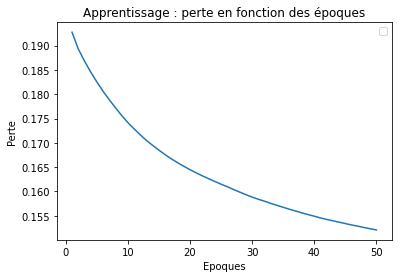

In [73]:
# graphique loss / epochs
plt.clf()
loss_train=modelfit.history['loss']
epochs=range(1,len(loss_train)+1)

plt.plot(epochs,loss_train)
plt.title('Apprentissage : perte en fonction des époques')
plt.xlabel('Epoques')
plt.ylabel('Perte')
plt.legend()
plt.show()

**Prédiction**

La prédiction du niveau de consommation électrique est calculée sur l'ensemble des variables de design de l'ensemble test ; elle sera recupérée sous la forme de 3 probabilités complémentaires (3 colonnes du data frame résultat):

* col 1 : la probabilité de sous-consommation électrique

* col 2 : la probabilité de consommation électrique normale

* col 3 : la probabilité de sur-consommation électrique

Nous arrondissons ces 3 probabilités à 0 (si<50%) à 1 sinon. Nous mettons ainsi en évidence ainsi pour chaque mesure une seule décision : sous-consommation / consommation normale/sur-consommation.


In [74]:
# Prédiction
Y_pred=model_Ycat.predict(X_test)
#prediction sous forme de (0,1)
for i in range(len(Y_pred)):
    for j in range(3):
        if (Y_pred[i][j]<0.5):
           (Y_pred[i][j]) =0
        else: 
           (Y_pred[i][j]) = 1


**Matrice de confusion**

In [75]:
# matrice de confusion
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
cm = confusion_matrix(Y_catind_test.argmax(axis=1),Y_pred.argmax(axis=1))
print('\nMatrice de confusion\n')
print(cm)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_catind_test.argmax(axis=1),Y_pred.argmax(axis=1))))



Matrice de confusion

[[   0    0    0]
 [   0 3637    2]
 [   1  305    2]]

Accuracy: 0.92



 La matrice de confusion confronte les vraies valeurs (en colonnes) à celles calculées par le modèle (en ligne). Elle donne les effectifs prédits en fonction des valeurs réellement constatées. 
 
Sur la diagonale, le nombre d'occurences correctement prédites ; elles représentent ici 91% des prédictions(accuracy).
Ce résultat est tout à fait satisfaisant.


NB : La sous-consommation n'étant pas constatée dans le jeu de données d'apprentissage, la matrice de confusion est une matrice 2X2 dans la majorité des compilations (les 2 occurences "conso normale" et "sur-consommation" se croisent en ligne et colonne).  
Il peut y avoir de rares cas où la prédiction indique "sous-consommation" ; la matrice de confusion sera alors de dimension 3X3, avec en 1er colonne et 1ere ligne les resprésentation des cas de sous-consommation.

**Evaluation**

In [69]:
# évaluation du modèle
score=model_Ycat.evaluate(X_test,Y_catind_test)
print(score)

124/124 [==============================] - 0s 1ms/step - loss: 0.1943 - accuracy: 0.9220
[0.19426481425762177, 0.9219660758972168]


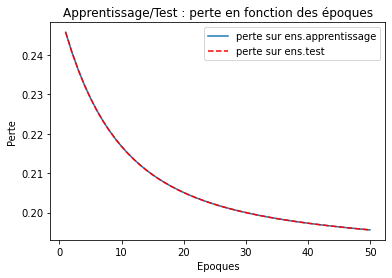

In [70]:
# graphique loss / epochs
plt.clf()
loss_train=modelfit.history['loss']
loss_test=modelfit.history['val_loss']
epochs=range(1,len(loss_train)+1)
plt.legend(['Training Loss', 'Test Loss'])
plt.plot(epochs,loss_train,label='perte sur ens.apprentissage')
plt.plot(epochs,loss_train,'r--',label='perte sur ens.test')
plt.title('Apprentissage/Test : perte en fonction des époques')
plt.xlabel('Epoques')
plt.ylabel('Perte')
plt.legend()
plt.show()

**Réseau de neurones à plus de 2 couches**

In [80]:
#Création du réseau de neurones 2 couches
model_Ycat2=km.Sequential()
from keras.layers import Dense
model_Ycat2.add(Dense(units=6, input_dim=26,activation="sigmoid"))
model_Ycat2.add(Dense(units=6, activation="sigmoid"))
model_Ycat2.add(Dense(units=6, activation="sigmoid"))
model_Ycat2.add(Dense(units=3, activation="softmax"))

In [82]:
#Apprentissage pour Epoch=50
modelfit2=model_Ycat2.fit(X_train, # Features d'apprentisssage
                        Y_catind_train, # Target d'apprentissage
                        epochs=50, # nombre d'époque
                        batch_size=1000 # nombre d'observations par batch
                        validation_data=(X_test, Y_catind_test)) # Données de l'évaluation 

RuntimeError: ignored

In [ ]:
# graphique loss / epochs
plt.clf()
loss_train2=modelfit2.history['loss']
epochs2=range(1,len(loss_train2)+1)

plt.plot(epochs2,loss_train2)
plt.title('Apprentissage : perte en fonction des époques')
plt.xlabel('Epoques')
plt.ylabel('Perte')
plt.legend()
plt.show()

In [ ]:
# Prédiction
Y_pred2=model_Ycat2.predict(X_test)
#prediction sous forme de (0,1)
for i in range(len(Y_pred2)):
    for j in range(3):
        if (Y_pred2[i][j]<0.5):
           (Y_pred2[i][j]) =0
        else: 
           (Y_pred2[i][j]) = 1

In [ ]:
# matrice de confusion
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
cm2 = confusion_matrix(Y_catind_test.argmax(axis=1),Y_pred2.argmax(axis=1))
print('\nMatrice de confusion\n')
print(cm2)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_catind_test.argmax(axis=1),Y_pred2.argmax(axis=1))))
